### 分析地震影响的城市 代码整合

In [1]:
# 引入模块与第三方包
import fiona
from pyproj import CRS, Transformer
from shapely.geometry import Point
import os
import pprint

# 读取 china_cities.shp 矢量文件
cities = fiona.open('./GeoData/china_cities.shp', 'r')

# 获取原始矢量文件的 driver, crs, schema 等参数
source_driver = cities.driver
source_crs = cities.crs
source_schema = cities.schema

# 建立 WGS84 地理坐标系
wgs = CRS.from_proj4("+proj=longlat +datum=WGS84 +no_defs")

# 构建 WGS84 地理坐标系转 Albers 投影坐标系的 Transformer
transformer_wgs2albers = Transformer.from_crs(wgs,cities.crs,always_xy=True)

# 将经纬度点转化为 Albers 投影坐标系的坐标值
point = (101, 27)
point_prj = transformer_wgs2albers.transform(point[0], point[1])

# 根据点坐标值实例化 shapely.geometry.Point 对象
point_prj = Point(point_prj)

# 创建 buffer 对象
point_buffer = point_prj.buffer(300000)

# 生成输出矢量文件，driver, crs, schema 等参数与 china_cities.shp 矢量文件相同，使用 'utf-8' 编码避免中文属性值乱码
target = fiona.open('./GeoData/influenced_points.shp', 'w', encoding='utf-8',
                    driver=source_driver,
                    crs=source_crs, 
                    schema=source_schema)

# 循环遍历 china_cities.shp 中所有点，找寻在 buffer 区域内的点对象，并保存到新文件中
for record in cities:
    coordinates = record['geometry']['coordinates']
    point = Point(coordinates)
    if point_buffer.contains(point):
        print(record['properties']['NAME'])
        target.write(record)

# 保存并关闭文件
target.close()
cities.close()

### 分析地震影响的城市 分步调试

In [1]:
# 引入模块与第三方包
import fiona
from pyproj import CRS, Transformer
from shapely.geometry import Point
import os
import pprint

In [2]:
# 读取 china_cities.shp 矢量文件
cities = fiona.open('./GeoData/china_cities.shp', 'r')

In [3]:
# 查看矢量文件的类型：Point 对象
print('schema_geometry:',cities.schema['geometry'])

schema_geometry: Point


In [4]:
# 获取原始矢量文件的 driver, crs, schema 等参数
source_driver = cities.driver
source_crs = cities.crs
source_schema = cities.schema

In [5]:
# 建立 WGS84 地理坐标系
wgs = CRS.from_proj4("+proj=longlat +datum=WGS84 +no_defs")

In [6]:
# 构建 WGS84 地理坐标系转 Albers 投影坐标系的 Transformer
transformer_wgs2albers = Transformer.from_crs(wgs,cities.crs,always_xy=True)

In [7]:
# 将经纬度点转化为 Albers 投影坐标系的坐标值
point = (101, 27)
point_prj = transformer_wgs2albers.transform(point[0], point[1])
point_prj

(-396910.84289483656, -885455.3704814231)

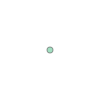

In [8]:
# 根据点坐标值实例化 shapely.geometry.Point 对象
point_prj = Point(point_prj)
point_prj

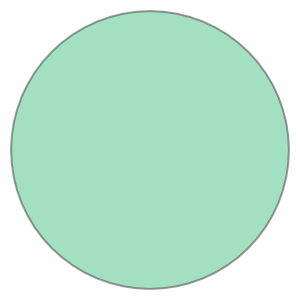

In [9]:
# 创建 buffer 对象
point_buffer = point_prj.buffer(300000)
point_buffer

In [10]:
# 生成输出矢量文件，driver, crs, schema 等参数与 china_cities.shp 矢量文件相同，使用 'utf-8' 编码避免中文属性值乱码
target = fiona.open('./GeoData/influenced_points.shp', 'w', encoding='utf-8',
                    driver=source_driver,
                    crs=source_crs, 
                    schema=source_schema)

# 循环遍历 china_cities.shp 中所有点，找寻在 buffer 区域内的点对象，并保存到新文件中
for record in cities:
    coordinates = record['geometry']['coordinates']
    point = Point(coordinates)
    if point_buffer.contains(point):
        print(record['properties']['NAME'])
        target.write(record)

# 保存并关闭文件
target.close()
cities.close()

楚雄市
保山市
大理市
怒江傈僳族自治州
泸水县
东川市
攀枝花市
丽江纳西族自治县
昭通市
中甸县
西昌市
昆明市
